<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/Reinforcement_Learning/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

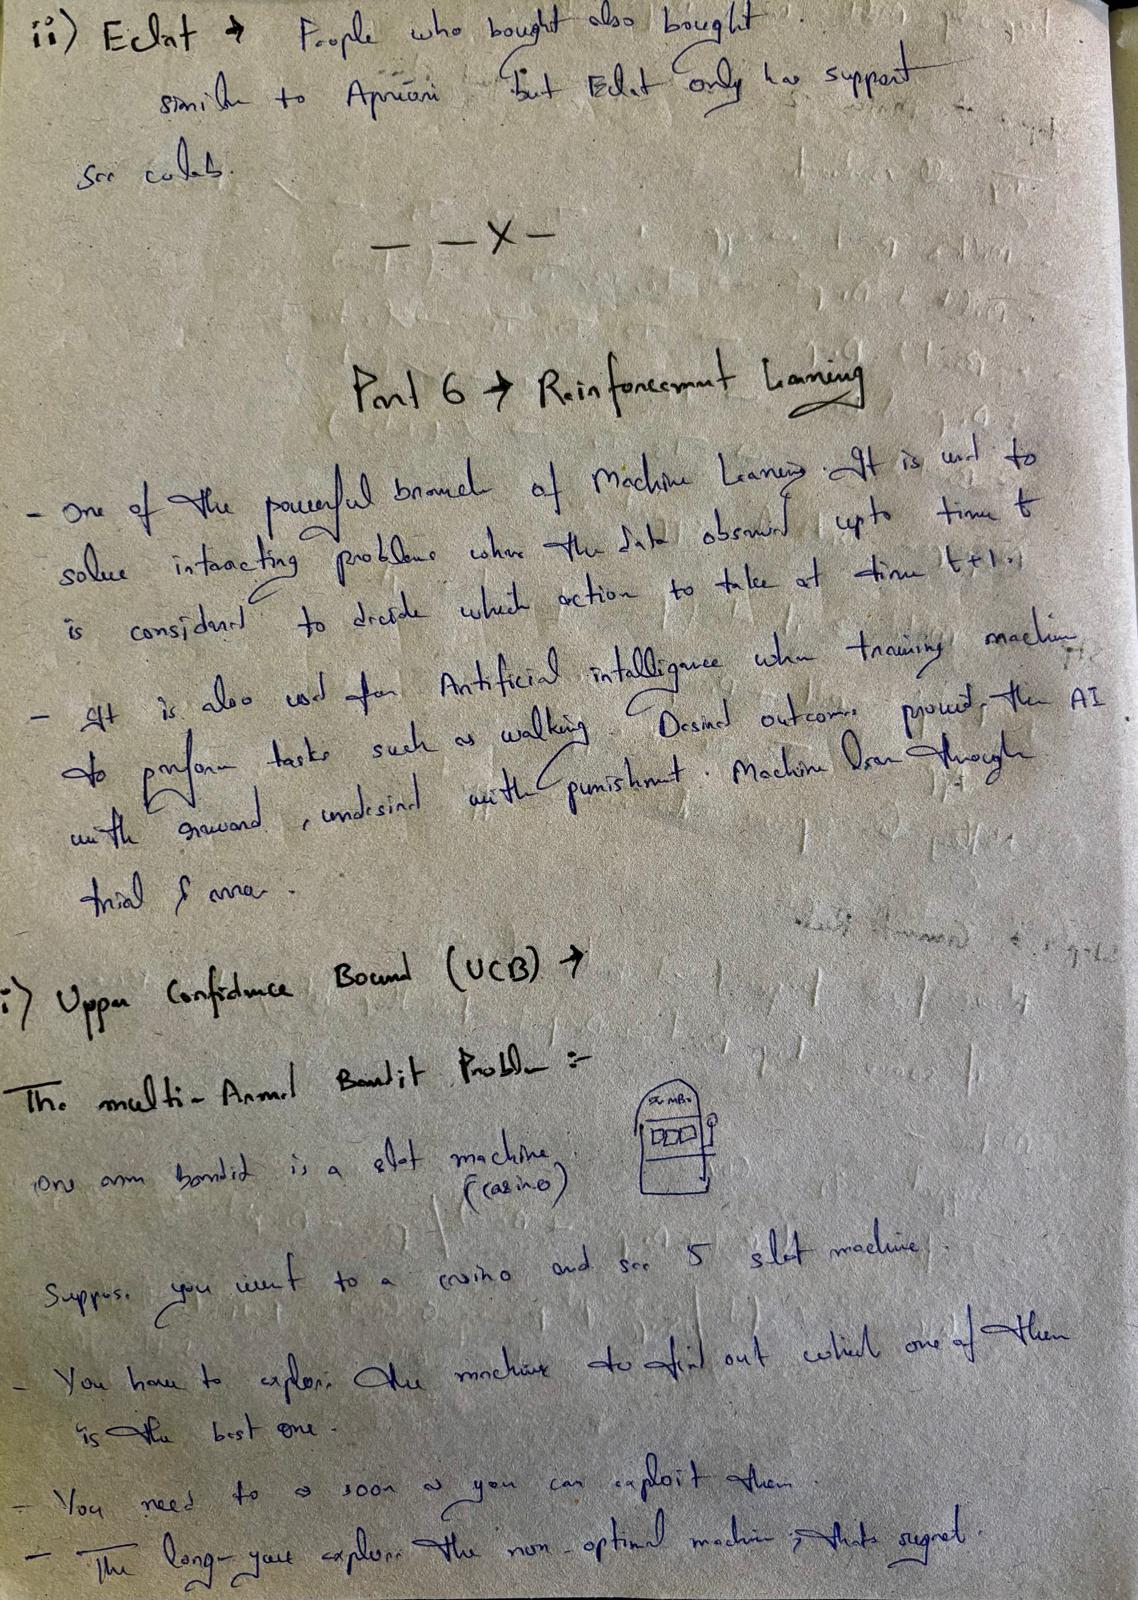

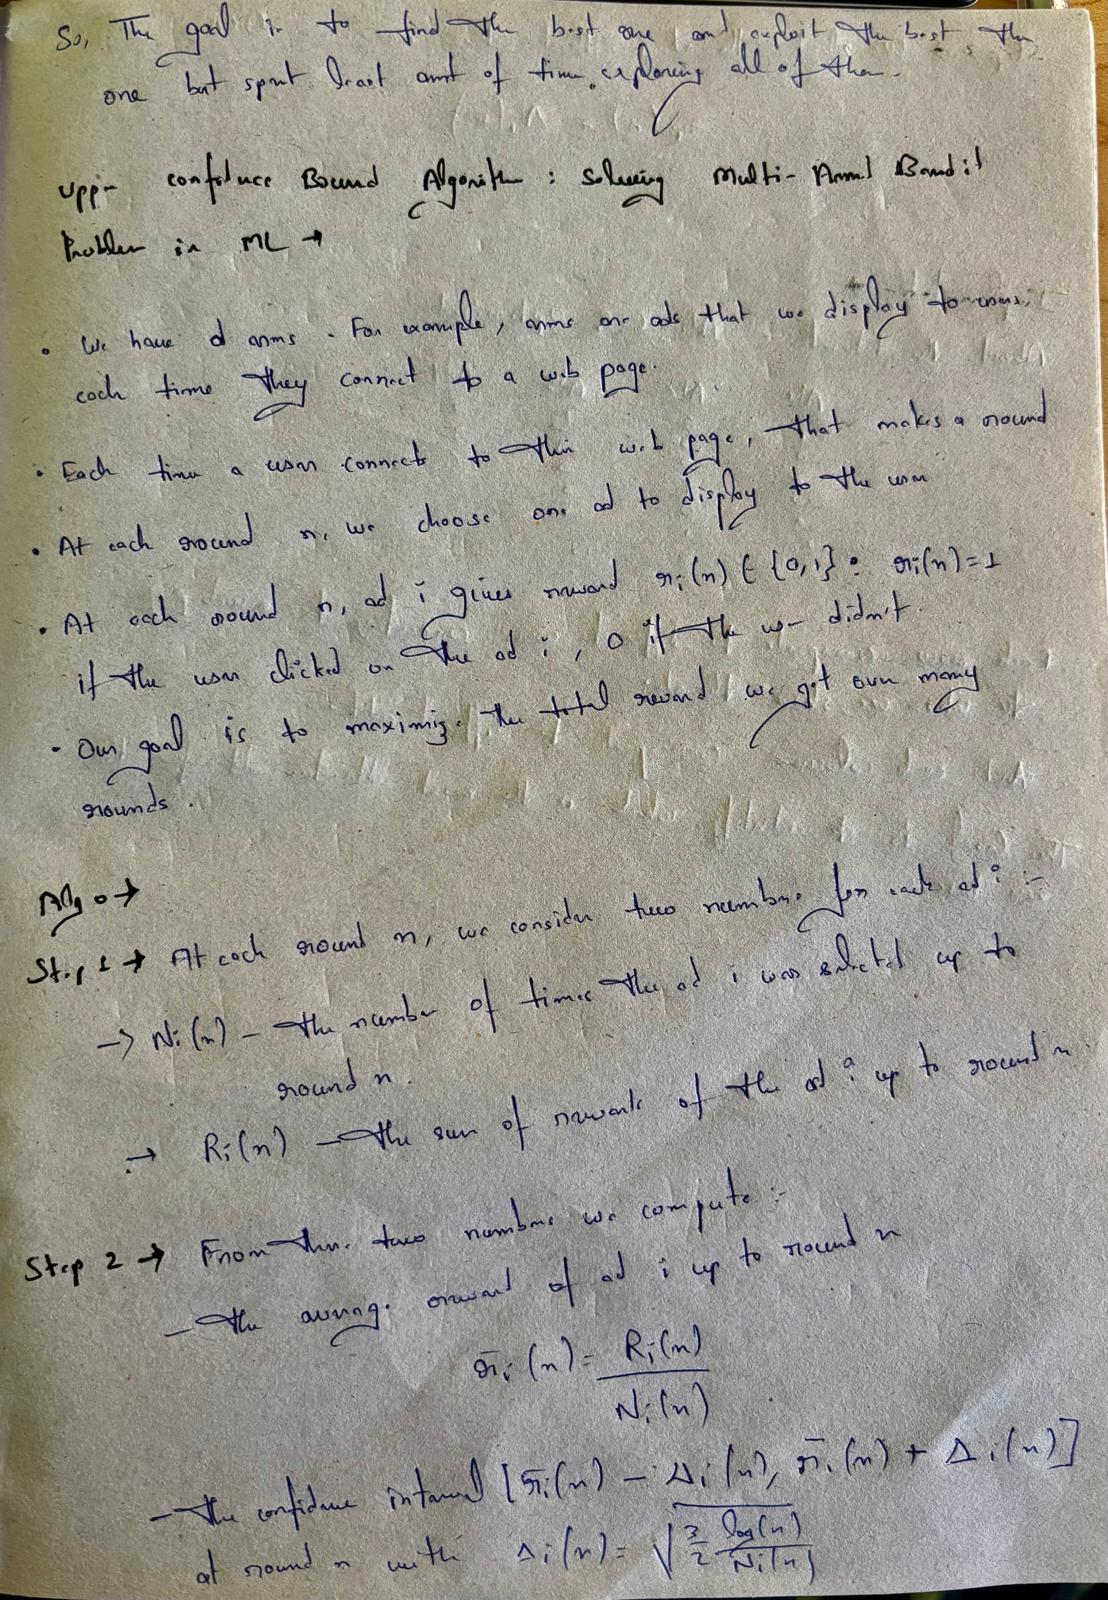

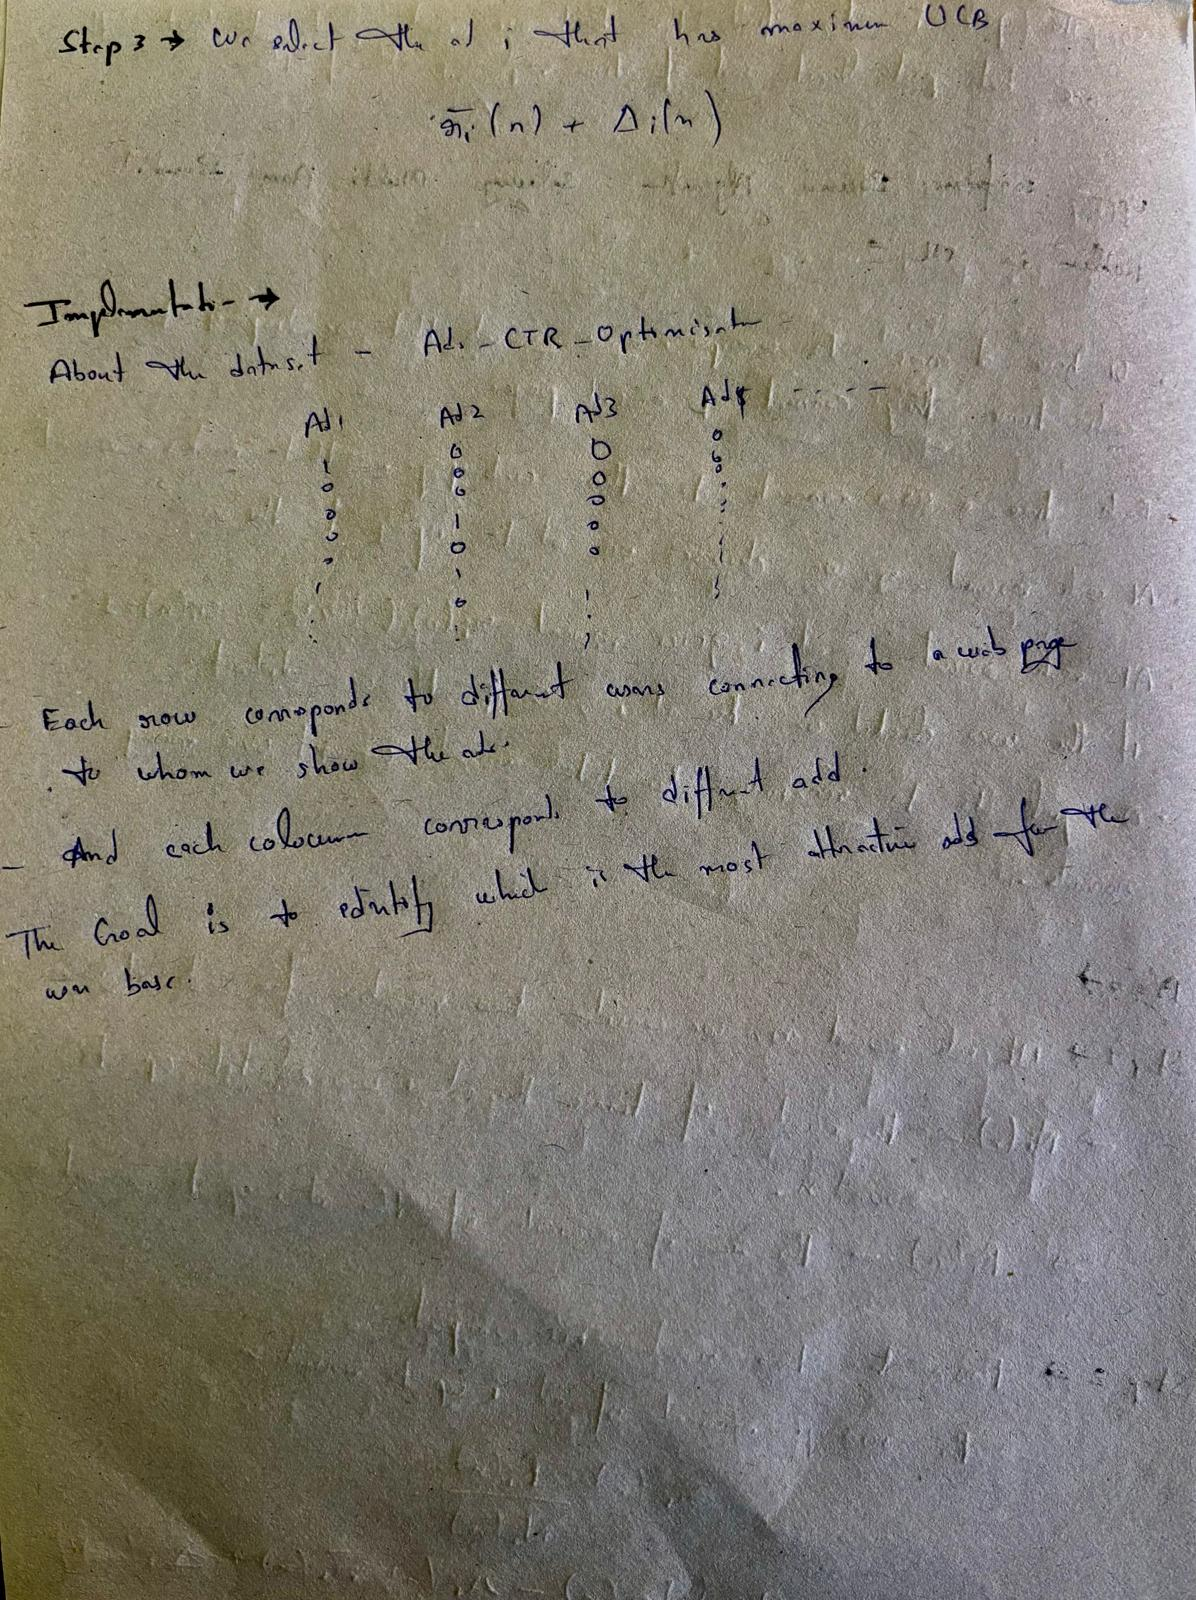

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [20]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [21]:
import math
N = 1000  # it needs more no of rounds to identify
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

| Variable                   | Role / Meaning                             |
| -------------------------- | ------------------------------------------ |
| `N`                        | Total number of rounds/users               |
| `d`                        | Number of available arms (e.g., ads)       |
| `ads_selected`             | Keeps history of choices                   |
| `numbers_of_selections[i]` | How often ad $i$ has been shown            |
| `sums_of_rewards[i]`       | Total reward (clicks) received from ad $i$ |
| `average_reward`           | Mean reward for that ad                    |
| `delta_i`                  | Confidence interval for exploration        |
| `upper_bound`              | Final UCB score (used to decide best ad)   |
| `reward`                   | Actual result (1 if click, 0 otherwise)    |
| `total_reward`             | Cumulative reward after all rounds         |


Great question, Tushar! 🧠

The **Multi-Armed Bandit (MAB)** problem is one of the foundational problems in **Reinforcement Learning** — and understanding it will help you make sense of **UCB, Thompson Sampling**, and many **real-world decision-making systems**.

---

## 🎰 Intuition: What is a Multi-Armed Bandit?

> Imagine you walk into a casino with **10 slot machines** (also called **one-armed bandits**).
> Each machine has a **different but unknown chance** of giving you money.

Your **goal**:
👉 Play these machines in some order to **win as much money as possible** over time.

---

## 🤔 Challenge:

You don’t know which machine is the best, so you must **balance**:

| Strategy    | Description                             |
| ----------- | --------------------------------------- |
| **Explore** | Try each machine to learn their payouts |
| **Exploit** | Keep playing the machine that pays most |

This tradeoff is called the **exploration-exploitation dilemma** — it's at the heart of the Multi-Armed Bandit.

---

## 🔧 Formal Definition:

| Element             | Meaning                                             |
| ------------------- | --------------------------------------------------- |
| **Arms**            | The choices available (e.g., slot machines, ads)    |
| **Reward**          | The value you get from pulling an arm (e.g., click) |
| **Strategy/Policy** | The method to choose which arm to pull              |
| **Objective**       | Maximize **cumulative reward** over time            |

---

## 📊 Real-Life Examples

| Domain                  | Multi-Armed Bandit Use Case                    |
| ----------------------- | ---------------------------------------------- |
| **Online ads**          | Show the most engaging ad to users             |
| **A/B testing**         | Test multiple web page designs continuously    |
| **Recommender systems** | Suggest the most clickable items               |
| **Healthcare**          | Decide which treatment to use for a patient    |
| **Finance**             | Try different trading strategies and pick best |

---

## 🧪 How MAB Is Different from Full RL

| Feature            | MAB   | Full RL                         |
| ------------------ | ----- | ------------------------------- |
| No states          | ✅ Yes | ❌ No (has states & transitions) |
| Immediate rewards  | ✅ Yes | ✅ Yes                           |
| Long-term planning | ❌ No  | ✅ Yes (delayed rewards)         |

So MAB is **simpler**, but **widely used** when state isn’t important.

---

## 🤖 MAB Algorithms

| Algorithm             | Idea                                               |
| --------------------- | -------------------------------------------------- |
| **Random**            | Pick randomly — no learning                        |
| **Epsilon-Greedy**    | Mostly exploit, but explore with small probability |
| **UCB**               | Exploit + optimism about less tried arms           |
| **Thompson Sampling** | Use probability distributions to balance choices   |

---

## ✅ TL;DR:

> **Multi-Armed Bandit** = "Choose the best option over time, while learning from trial and error."

It’s used **everywhere** when decisions must be made **sequentially and adaptively** — without overthinking the future.

---

## Visualising the results

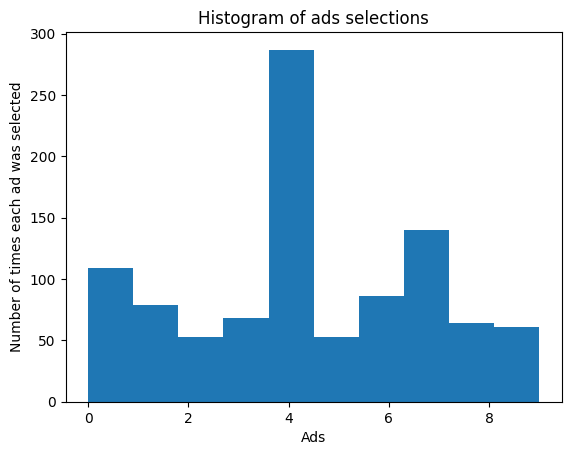

In [22]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()